# COGS 108 - Final Project
https://www.youtube.com/watch?v=p-eRyRQhacI

# Permissions

- [X] YES - make available


# Names

- Adomas Vaitkus
- Amber Tang
- Johanna Phan
- Annalise Ahn

# Abstract

We started our project by considering various data sets that we found to be of interest. We wanted one that would be large enough to yield some decent conclusions and also diverse enough to account for various factors. We settled on the question of dog adoption in the U.S. and began working on cleaning the data set as it was too large originally. We then began considering various factors within the data set and comparing them to see what factors made a dog more likely to be admitted into a shelter.

Some of the conclusions we drew related to basical physical attributes which included age, sex, size, and coat. After this, we considered various behavioral and health traits including updated vaccination records and being trained in various environments including with children, dogs, and cats. Finally, we drew conclusions based on some broader features including color and breed. Most of our work was done through graphs and visuals followed by analysis.

# Research Question

How do certain factors such as breed, age, size, sex, etc. influence the liklihood of a dog being brought into a shelter in the US?



## Background and Prior Work


Every year, millions of dogs of all shapes and sizes are brought into rescue shelters across the US. These shelters are becoming increasingly overwhelmed by abandoned dogs: In 2023, there were 250,000 more animals in the shelter system than the year before.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) By analyzing what influences a dog’s likelihood of being brought into a shelter, we hope to identify key factors that contribute to this rise in abandoned dogs. By understanding trends like breed, age, size, and behavioral traits that may impact surrender rates, we can help to decrease shelter intake rates and increase the chances of finding each dog a stable, loving home.

Out of the 3.1 million dogs that enter adoption centers every year, about 2 million are adopted, and about 920k end up euthanized. According to these statistics, dogs in adoption facilities have approximately a 2/3 chance of being adopted each year and a 1/3 chance of being euthanized.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) By analyzing these statistics, we aim to understand how to improve these numbers.

Only 23% of dogs taken in by families and individuals come from animal shelters. It is also estimated that 75% of the pets that were surrendered for adoption were because of disobedience, barking, hyperactivity, and aggression.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) Some physical traits of dogs least likely to be adopted from shelters include black dogs, senior dogs, and dogs with health problems. Mental traits of unlikely adoptees include having behavior problems and being a bonded pair with another dog.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4)

A previous study looks into patterns of genetic heritage found among shelter dogs at two animal shelters in Phoenix, Arizona and San Diego, California. There were 125 distinct breeds, but only 4.9% were purebred. This suggests mixed breeds are more likely to be brought to shelters. The study also found that the most common dog breeds in shelters were American Staffordshire Terriers, Chihuahuas, and Poodles. Additionally, it took significantly longer for dogs with pitbull-type ancestries to get adopted.<a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5)

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Gibson, K. (2024, January 9). Animal shelters are overwhelmed by abandoned dogs. Here’s why. CBS News. https://www.cbsnews.com/news/animal-shelters-overwhelmed-by-abandoned-dogs/ 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Pet statistics. (n.d.). ASPCA. https://www.aspca.org/helping-people-pets/shelter-intake-and-surrender/pet-statistics 
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Rainwalk. (2024, October 22). Pet adoption statistics 2022. Rainwalk Pet Insurance. https://rainwalkpetinsurance.com/pet-adoption-statistics-2022/#:~:text=Some%20of%20the%20reasons%20why%20these%20end,among%20all%20dog%20breeds%2C%20Pit%20Bulls%20& 
4. <a name="cite_note-4"></a> [^](#cite_ref-4) Johnstone, G. (2022, July 19). These dogs are the last to be adopted. The Spruce Pets. https://www.thesprucepets.com/last-dogs-to-be-adopted-4586942 
5. <a name="cite_note-5"></a> [^](#cite_ref-5) Gunter, L. M., Barber, R. T., & Wynne, C. D. L. (2018). A canine identity crisis: Genetic breed heritage testing of shelter dogs. PLoS ONE, 13(8), e0202633. https://doi.org/10.1371/journal.pone.0202633 


# Hypothesis


We predict a strong positive correlation between a dog's behavioral factors and its liklihood of being brought into a shelter. This is because we believe owners tend to care more about the temperament of a dog than its physical appearance. Specific behavioral factors in family settings would include being house trained and being good with children, and any special needs. We predict the lowest correlation to be with sex, age, and color of the dog for the same reason.

# Data Overview

- Original Dataset Name: allDogDescriptions
- Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/dog-adoption?select=allDogDescriptions.csv
- Number of observations: 58,200
- Number of variables: 35

This dataset is a csv file containing information about adoptable dogs found on petfinder.com. It includes information on where the dog is located, breed, color, age, sex, size, coat, health status, and behavioral traits.
The health variables (fixed, special_needs) and behavior variables (house_trained, shots_current, env_children, env_dogs, env_cats) are all boolean types, while the rest are string type categorical variables.

## FinalDogDescriptions Dataset

Some of the variables in the original dataset are redundant such as the species column and country column, since the values are all 'dog' and 'USA' respectively. We chose to remove these columns and others like them. We also decided to remove rows that were missing data in the breed, primary color, and behavior/health columns. Finally, we replaced the remaining null values with a string 'None'.

In [15]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context = 'talk', style = 'white')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import branca
import folium
import json
import matplotlib.image as mpimg

In [16]:
# read in original dataset
df = pd.read_csv("C:\\Users\\amber\\Downloads\\OriginalAllDogDescriptions.csv (1)\\allDogDescriptions.csv")

# drop unnecesary columns
columns_to_drop = ['id', 'org_id', 'url', 'type.x', 'declawed', 'status', 'type.y','index', 'species', 'accessed', 'stateQ', 'contact_country', 'breed_unknown', 'accessed', 'description', 'posted']
df.drop(columns_to_drop, inplace=True, axis=1)

# drop aforementioned rows with missing data
rows_to_drop = ['color_primary', 'age', 'size', 'coat', 'fixed', 'house_trained', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'env_cats']
df.dropna(subset=rows_to_drop, inplace=True)

# replace remaining null values with 'None'
df = df.replace(np.NaN, 'None')

# saves newly wrangled dataset as a csv file
df.to_csv("C:\\Users\\amber\\Downloads\\OriginalAllDogDescriptions.csv\\OriginalAllDogDescriptions.csv")
df


C:\Users\amber\AppData\Local\Temp\ipykernel_99392\3289865085.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(np.NaN, 'None')


breed_primary           breed_secondary  breed_mixed  \
89                    Chihuahua                      None         True   
237        Jack Russell Terrier                      None         True   
238               Irish Terrier                      None        False   
239           Yorkshire Terrier                      None        False   
240               Cairn Terrier                      None        False   
...                         ...                       ...          ...   
58168  Black Labrador Retriever                  Shar-Pei         True   
58169             Border Collie  Black Labrador Retriever         True   
58170        Labrador Retriever          Pit Bull Terrier         True   
58171        Labrador Retriever                  Shar-Pei         True   
58173        Labrador Retriever                     Hound         True   

                          color_primary              color_secondary  \
89                        White / Cream                         None   
237    Tricolor (Brown, Black, & White)                         None   
238             Red / Chestnut / Orange                White / Cream   
239                Gray / Blue / Silver  Yellow / Tan / Blond / Fawn   
240                               Black                White / Cream   
...                                 ...                          ...   
58168                             Black                White / Cream   
58169                             Black                White / Cream   
58170                             Black  Yellow / Tan / Blond / Fawn   
58171                            Golden                         None   
58173                 Brown / Chocolate                White / Cream   

      color_tertiary     age     sex    size    coat  ...  house_trained  \
89              None   Young  Female   Small   Short  ...           True   
237             None   Young    Male   Small   Short  ...          False   
238             None   Adult    Male   Small   Short  ...          False   
239             None  Senior    Male   Small  Medium  ...          False   
240             None   Adult  Female   Small   Short  ...          False   
...              ...     ...     ...     ...     ...  ...            ...   
58168           None   Adult  Female  Medium   Short  ...          False   
58169           None   Adult    Male  Medium  Medium  ...          False   
58170           None   Adult    Male  Medium   Short  ...          False   
58171           None   Adult    Male  Medium   Short  ...          False   
58173           None   Adult  Female  Medium   Short  ...          False   

       special_needs  shots_current  env_children  env_dogs  env_cats  \
89             False           True          True      True      True   
237            False           True          True      True     False   
238            False           True          True      True      True   
239            False           True          True      True      True   
240            False           True          True      True      True   
...              ...            ...           ...       ...       ...   
58168          False           True          True      True      True   
58169          False           True          True      True     False   
58170          False           True          True      True     False   
58171          False           True          True     False     False   
58173          False           True         False     False     False   

           name contact_city contact_state contact_zip  
89        Frost    Henderson            NV       89009  
237          TD      Pahrump            NV       89048  
238      Mohave      Pahrump            NV       89048  
239    Maverick      Pahrump            NV       89048  
240       Daisy      Pahrump            NV       89048  
...         ...          ...           ...         ...  
58168    Mandie      Worland            WY       82401  
58169      Joey   

# Results

We read in our newly cleaned dataset and took a first look at the data.

In [19]:
#import cleaned file from github
dogs = pd.read_csv('FinalDogDescriptions.txt')
dogs = dogs.drop(columns = ["Unnamed: 0"])

#look at table
dogs

breed_primary           breed_secondary  breed_mixed  \
0                    Chihuahua                       NaN         True   
1         Jack Russell Terrier                       NaN         True   
2                Irish Terrier                       NaN        False   
3            Yorkshire Terrier                       NaN        False   
4                Cairn Terrier                       NaN        False   
...                        ...                       ...          ...   
6694  Black Labrador Retriever                  Shar-Pei         True   
6695             Border Collie  Black Labrador Retriever         True   
6696        Labrador Retriever          Pit Bull Terrier         True   
6697        Labrador Retriever                  Shar-Pei         True   
6698        Labrador Retriever                     Hound         True   

                         color_primary              color_secondary  \
0                        White / Cream                          NaN   
1     Tricolor (Brown, Black, & White)                          NaN   
2              Red / Chestnut / Orange                White / Cream   
3                 Gray / Blue / Silver  Yellow / Tan / Blond / Fawn   
4                                Black                White / Cream   
...                                ...                          ...   
6694                             Black                White / Cream   
6695                             Black                White / Cream   
6696                             Black  Yellow / Tan / Blond / Fawn   
6697                            Golden                          NaN   
6698                 Brown / Chocolate                White / Cream   

     color_tertiary     age     sex    size    coat  ...  house_trained  \
0               NaN   Young  Female   Small   Short  ...           True   
1               NaN   Young    Male   Small   Short  ...          False   
2               NaN   Adult    Male   Small   Short  ...          False   
3               NaN  Senior    Male   Small  Medium  ...          False   
4               NaN   Adult  Female   Small   Short  ...          False   
...             ...     ...     ...     ...     ...  ...            ...   
6694            NaN   Adult  Female  Medium   Short  ...          False   
6695            NaN   Adult    Male  Medium  Medium  ...          False   
6696            NaN   Adult    Male  Medium   Short  ...          False   
6697            NaN   Adult    Male  Medium   Short  ...          False   
6698            NaN   Adult  Female  Medium   Short  ...          False   

      special_needs  shots_current  env_children  env_dogs  env_cats  \
0             False           True          True      True      True   
1             False           True          True      True     False   
2             False           True          True      True      True   
3             False           True          True      True      True   
4             False           True          True      True      True   
...             ...            ...           ...       ...       ...   
6694          False           True          True      True      True   
6695          False           True          True      True     False   
6696          False           True          True      True     False   
6697          False           True          True     False     False   
6698          False           True         False     False     False   

          name contact_city contact_state contact_zip  
0        Frost    Henderson            NV       89009  
1           TD      Pahrump            NV       89048  
2       Mohave      Pahrump            NV       89048  
3     Maverick      Pahrump            NV       89048  
4        Daisy      Pahrump            NV       89048  
...        ...          ...           ...         ...  
6694    Mandie      Worland            WY       82401  
6695      Joey      Worland            WY       82401  
6696       Sam   

## Dog Locations

To understand whether our data was biased across locations, we first looked at the distribution of entries across states.

In [22]:
#get state counts
state_counts = dogs['contact_state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

#add missing state data
state_counts = state_counts.iloc[:-2]
new_row = {'state': "HI", 'count': 0}
state_counts.loc[len(state_counts)] = new_row
new_row = {'state': "MT", 'count': 0}
state_counts.loc[len(state_counts)] = new_row
#make dictionary
state_dict = state_counts.set_index("state")["count"]

We decided to make a chloropleth map to better visualize the location biases of our data.

In [24]:

from branca.colormap import linear


#load json file for states shape data
geojson_file_path = "C:\\Users\\amber\\Downloads\\archive\\us-states.json" # Update with your actual path
with open(geojson_file_path, 'r') as file:
    geojson_data = json.load(file)


#create colormap
colormap = branca.colormap.linear.YlGnBu_09.scale(state_counts['count'].min(), state_counts['count'].max())

colormap

#create folium map
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    geojson_data,
    name="state",
    style_function=lambda feature: {
        "fillColor": colormap(state_dict[feature["id"]]),
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.9,
    },
).add_to(m)

folium.LayerControl().add_to(m)
m



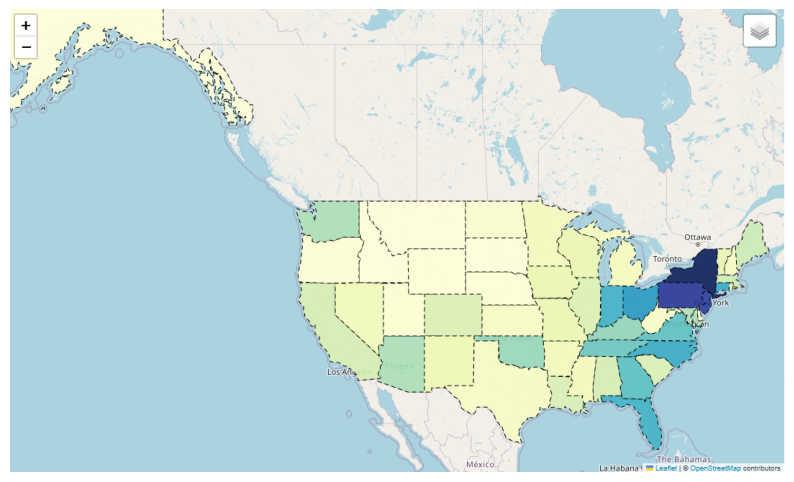

In [25]:
# the graph won't show in github, so it's uploaded as an image here
img = mpimg.imread("C:\\Users\\amber\\Downloads\\Screenshot 2024-12-09 163904.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off') 
plt.show()

From the map above it is clear that the data from Petfinder isn't evenly distributed across all of America. There is an especially large concentration of entries from the east coast, more specifically in New York and Pennsylvania. This will be important to keep in mind as we draw conclusions from the data.

## Basic Physical Attributes

Then, we looked at the basic physical attributes (age, sex, size, and coat) to see the distributions among the dogs up for adoption.

In [29]:
age = dogs["age"]
age_count = age.value_counts()
age_count

age
Adult     2816
Baby      1820
Young     1541
Senior     522
Name: count, dtype: int64

In [30]:
sex = dogs["sex"]
sex_count = sex.value_counts()
sex_count

sex
Male      3372
Female    3327
Name: count, dtype: int64

In [31]:
size = dogs["size"]
size_count = size.value_counts()
size_count

size
Medium         3504
Large          1744
Small          1295
Extra Large     156
Name: count, dtype: int64

In [32]:
coat = dogs["coat"]
coat_count = coat.value_counts()
coat_count

coat
Short       4939
Medium      1332
Long         324
Wire          58
Curly         38
Hairless       8
Name: count, dtype: int64

### Graphs

We created graphs to visualize the distributions of the variables and compared them to the overall US dog population.

#### Age

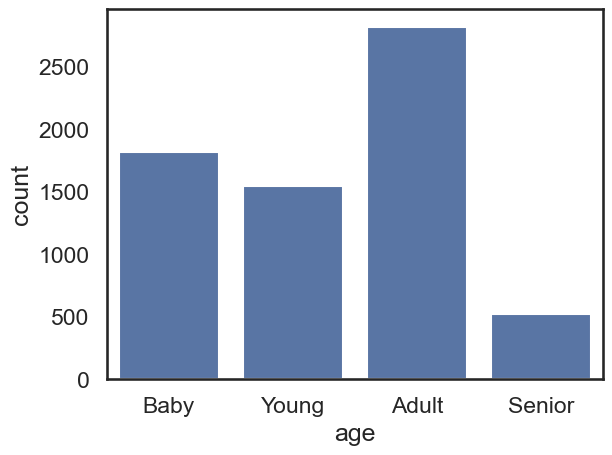

In [36]:
# age bar graph
age_plot = sns.countplot(data=dogs, x=age, order=['Baby', 'Young', 'Adult', 'Senior'])

The graph above shows that there are the most Adult dogs in shelters and the fewest Senior dogs.
According to MRI-Simmons data, 52% of dog-owning households in the US owned a Senior dog in 2022. On the other hand, only 9% owned a Puppy under one year old.<a name="cite_ref-6"></a>[<sup>6</sup>](#cite_note-6) When we compare this to the above distribution of ages, it is clear that the population of dogs in shelters is much younger on average than the overall dog population.

‌

#### Sex

In [39]:
# sex bar graph
sex_plot = sns.countplot(data=dogs, x=sex)

In [40]:
chi2_stat, p_value = stats.chisquare(sex_count)
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 0.30228392297357815
P-value: 0.5824541363586802


The graph above shows a very small difference between Male and Female dogs. To be sure of this, we do a Chi-squared test.
The p-value of the chi-squared test above is about 0.5, suggesting that the difference between the number of Male and Female dogs in the dataset is purely due to chance. We can conclude that there is likely no correlation between a dog's sex and its likelihood of being put in a shelter.

#### Size

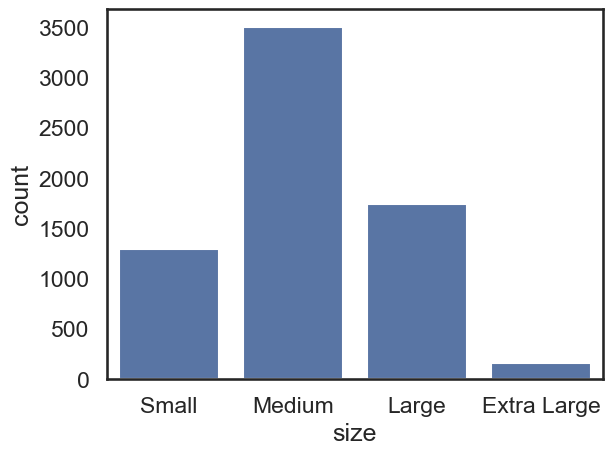

In [43]:
# size bar graph
size_plot = sns.countplot(data=dogs, x=size, order=['Small', 'Medium', 'Large', 'Extra Large'])

The graph above shows that there are the most Medium-sized dogs in shelters, and the least Small and Extra-Large dogs.
According to the 2021-2022 APPA Survey, 47% of dog-owning households own a Small dog, 31% own a Medium dog, and 36% own a Large dog.<a name="cite_ref-7"></a>[<sup>7</sup>](#cite_note-7) We were not able to find any reliable data on 'Extra Large' dogs, as they were grouped in with 'Large' dogs. When comparing this to the distribution shown above, the number of Medium dogs is disproportionally high, while the number of Small dogs is disproportionally low.

#### Coat

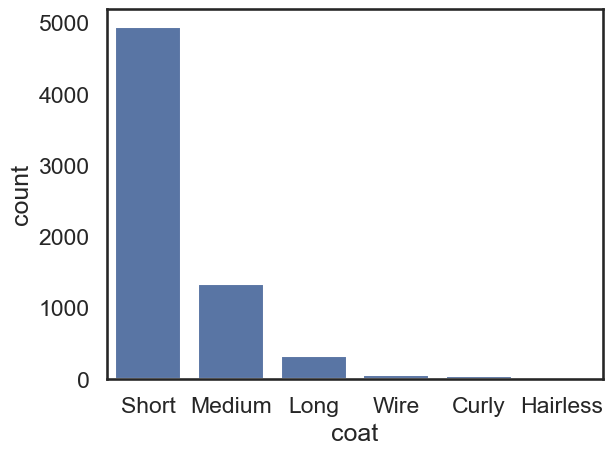

In [46]:
# coat bar graph
coat_plot = sns.countplot(data=dogs, x=coat, order=['Short', 'Medium', 'Long', 'Wire', 'Curly', 'Hairless'])

According to the graph above, there are the most Short-haired dogs in shelters, followed by Medium, then Long, then Hairless. Because Wire and Curly are hair *textures* and not lengths, we will not take them into account.
We could not find any exact data on the distribution of coat lengths in the general dog population. However, the short category does seem to be disproportionally high compared to the dogs that we see every day. A possible explanation for this is the prevalence in shelters of certain breeds that happen to have short hair, like pitbull terriers and labrador retreivers. We will discuss the breeds in more detail later in our analysis.

6. <a name="cite_note-6"></a> [^](#cite_ref-6) “Seniors” are a growing part of the pet population. (2023, December 7). GlobalPETS. https://globalpetindustry.com/article/seniors-are-growing-part-pet-population/
7. <a name="cite_note-7"></a> [^](#cite_ref-7) The Humane Society of The United States. (2021). Pets by the numbers. HumanePro. https://humanepro.org/page/pets-by-the-numbers


## Behavioral/Health Traits

After this we considered the 7 columns with boolean data (TRUE/FALSE), both individually and collectively. These variables are related since they are all related to behavior and health. We expected each of these to give the dogs a better chance of being admitted into the shelter, with the exception of special_needs which has the reverse effect. We will therefore consider 'False' as a positive value and 'True' as a zero value for this case only.

In [51]:
fixed = dogs["fixed"]
fixed.value_counts()

fixed
True     5800
False     899
Name: count, dtype: int64

In [52]:
house_trained = dogs["house_trained"]
house_trained.value_counts()

house_trained
True     3958
False    2741
Name: count, dtype: int64

In [53]:
special_needs = dogs["special_needs"]
special_needs.value_counts()

special_needs
False    6273
True      426
Name: count, dtype: int64

In [54]:
shots_current = dogs["shots_current"]
shots_current.value_counts()

shots_current
True     6264
False     435
Name: count, dtype: int64

In [55]:
env_children = dogs["env_children"]
env_children.value_counts()

env_children
True     5530
False    1169
Name: count, dtype: int64

In [56]:
env_dogs = dogs["env_dogs"]
env_dogs.value_counts()

env_dogs
True     5608
False    1091
Name: count, dtype: int64

In [57]:
env_cats = dogs["env_cats"]
env_cats.value_counts()

env_cats
True     4477
False    2222
Name: count, dtype: int64

In [58]:
tf_cols = ['fixed', 'house_trained', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'env_cats']
new_df = dogs
new_df['special_needs'] = ~new_df['special_needs']
new_df = dogs[tf_cols].astype(int)
new_df['sum'] = new_df[tf_cols].sum(axis=1)
new_df.value_counts('sum').sort_index()

sum
1      10
2      56
3     232
4     707
5    1511
6    2572
7    1611
Name: count, dtype: int64

We hypothesize that it would be positive to have TRUE in the columns of: fixed, house_trained, shots_current, env_children, env_dogs, env_cats. We would also hypothesize that it would be positive to have FALSE in the special_needs column when it comes to being admitted into a shelter. Since shelters need to consider the adoptability of a dog when they decide to take it in, there are certain medial and luxury things the dog should be able to meet. For example, medically it is positive for the dog to be fixed and have their vaccination records be current. Behavioral traits that are seen as positive include being house trained, not having special needs(as this requires significantly more care), and being trained in an environment with children, dogs, and/or cats.

### Graphs

The first graph shows the total number of attributes that are True for each dog. Dogs that have more positive value columns are expected to be more adoptable.

In [62]:
new_df.value_counts('sum').sort_index().plot.bar(xlabel='Total Number of T/F columns true',ylabel='Count of Dogs That Have x T/F Columns True',rot=0)

<Axes: xlabel='Total Number of T/F columns true', ylabel='Count of Dogs That Have x T/F Columns True'>

In [63]:
new_df['sum'].describe()

count    6699.000000
mean        5.659054
std         1.120220
min         1.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: sum, dtype: float64

As is demonstrated in the graph, a plurality is reached in dogs having 6 of these desirable attributes with exactly 0 dogs having none of these attributes and a trace number having only 1 or 2. The mean of 5.659 is significant since it indicates a left-skewed graph due to the small amount of dogs with a low number of these characteristics fulfilled.

This second graph examines each T/F column individually, where blue indicates that the dog has this positive quality and orange indicates it does not.

In [66]:
new_df2 = dogs[tf_cols].copy()
true_vals = [new_df2['fixed'].value_counts()[True], new_df2['house_trained'].value_counts()[True], new_df2['special_needs'].value_counts()[True],
            new_df2['shots_current'].value_counts()[True], new_df2['env_children'].value_counts()[True], new_df2['env_dogs'].value_counts()[True],
            new_df2['env_cats'].value_counts()[True]]
false_vals = [new_df2['fixed'].value_counts()[False], new_df2['house_trained'].value_counts()[False], new_df2['special_needs'].value_counts()[False],
            new_df2['shots_current'].value_counts()[False], new_df2['env_children'].value_counts()[False], new_df2['env_dogs'].value_counts()[False],
            new_df2['env_cats'].value_counts()[False]]
new_df3 = pd.DataFrame({'True': true_vals, 'False': false_vals}, index=tf_cols)
ax = new_df3.plot.bar(rot=15, stacked=True)

Based on this graph, and the distributions shown above, it seems the most prevalent factors for the dog to have to be admitted to the shelter are not having special needs and having their vaccinations be current. While the least likely is that they are house trained or be trained in an environment with cats. We hypothesize that this would be mostly due to dogs being poorly behaved. Special needs being near the top would likely be due to a lower population of dogs having special needs. Finally, being trained in an environment with cats being near the bottom would likely be a result of not much mixing between cats and dogs in most households.

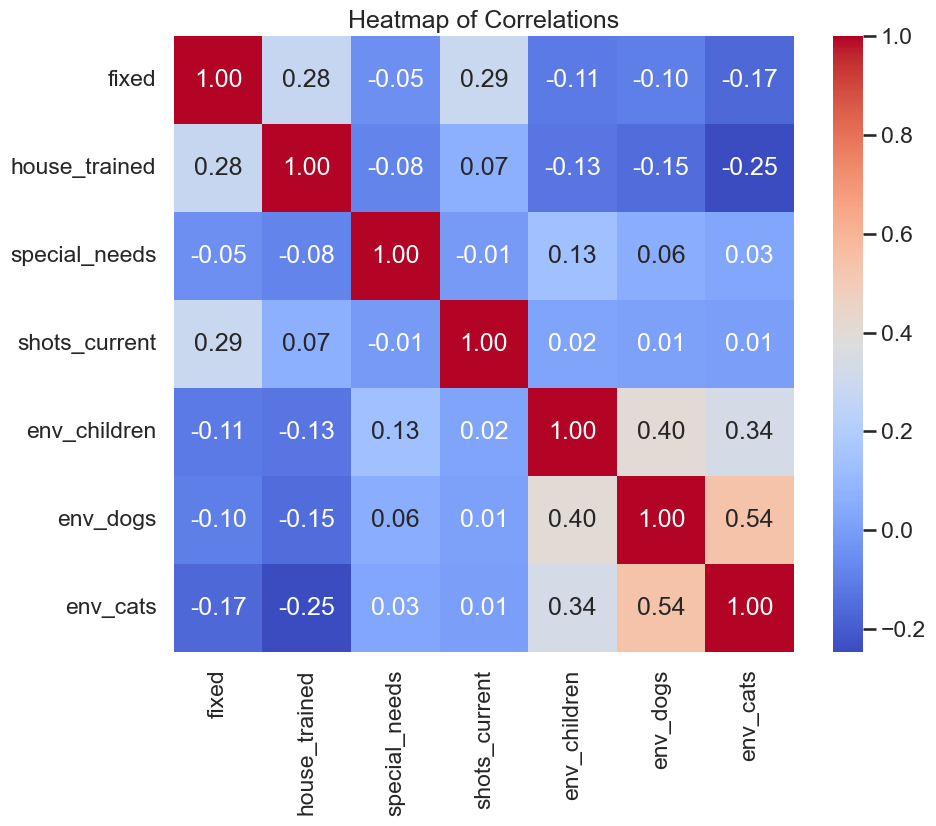

In [68]:
heatmap_df = dogs[tf_cols].astype(int)
heatmap_df
correlation_matrix = heatmap_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()

We wanted to see if there was any correlation between these health and behavioral factors. Overall there weren't any significantly strong correlations between these factors. The largest one was a 0.54 correlation between "env_dogs" and "env_cats" suggesting that dogs that behave well with other dogs also behave well with cats. From this heatmap we see that there isn't any specific combination between these variables that makes a dog more likely to be listed for adoption.

## Breeds/Colors

This graph shows the correlation between the amount of breeds brought into the shelter and their coat colors. 

In [72]:
#looking at the most frequent dog breeds listed for adoption on Petfinder

dogs_breeds = dogs.dropna(subset = ['breed_primary'])

breeds = dogs_breeds['breed_primary'].value_counts().reset_index()
breeds.columns = ['breed_primary', 'count']

top10_breeds = breeds.head(10)
top10_breeds

breed_primary  count
0              Labrador Retriever    787
1                Pit Bull Terrier    780
2                       Chihuahua    446
3                           Boxer    265
4                         Terrier    248
5  American Staffordshire Terrier    245
6             German Shepherd Dog    229
7                           Hound    222
8                          Beagle    213
9                        Shepherd    182

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Labrador Retriever'),
  Text(1, 0, 'Pit Bull Terrier'),
  Text(2, 0, 'Chihuahua'),
  Text(3, 0, 'Boxer'),
  Text(4, 0, 'Terrier'),
  Text(5, 0, 'American Staffordshire Terrier'),
  Text(6, 0, 'German Shepherd Dog'),
  Text(7, 0, 'Hound'),
  Text(8, 0, 'Beagle'),
  Text(9, 0, 'Shepherd')])

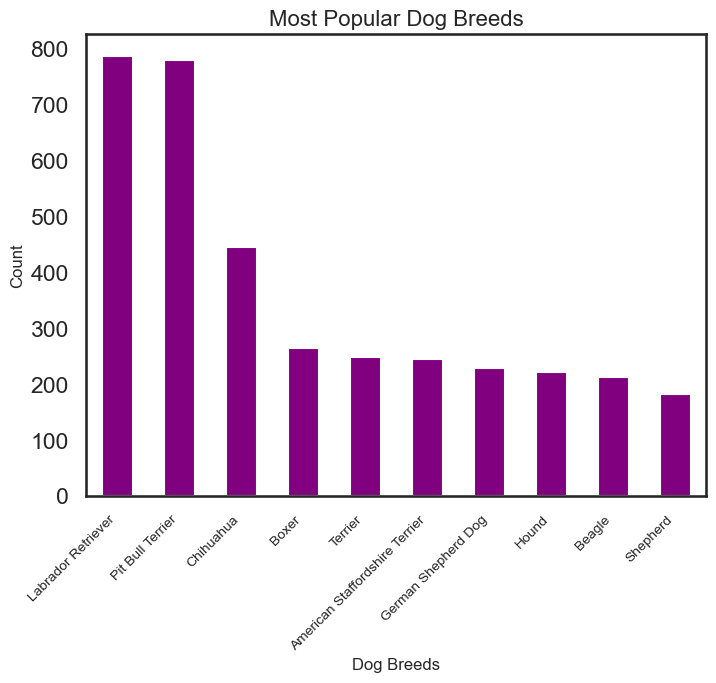

In [73]:
top10_breeds_indexed = top10_breeds.set_index('breed_primary')
plt.figure(figsize=(8, 6))
top10_breeds_indexed['count'].plot(kind='bar', color='purple')

plt.title('Most Popular Dog Breeds', fontsize=16)
plt.xlabel('Dog Breeds', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

This data shows the 10 most popular dog breeds out of all of the dogs in the shelters. 

In [75]:
#looking at most frequent colors of dogs listed for adoption on Petfinder

dogs_colors = dogs.dropna(subset = ['color_primary'])

color = dogs_colors['color_primary'].value_counts().reset_index()
breeds.columns = ['color_primary', 'count']

top5_colors = color.head(5)
top5_colors

color_primary  count
0                             Black   1946
1                     White / Cream    853
2  Tricolor (Brown, Black, & White)    562
3                 Brown / Chocolate    555
4                           Brindle    485

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White / Cream'),
  Text(2, 0, 'Tricolor (Brown, Black, & White)'),
  Text(3, 0, 'Brown / Chocolate'),
  Text(4, 0, 'Brindle')])

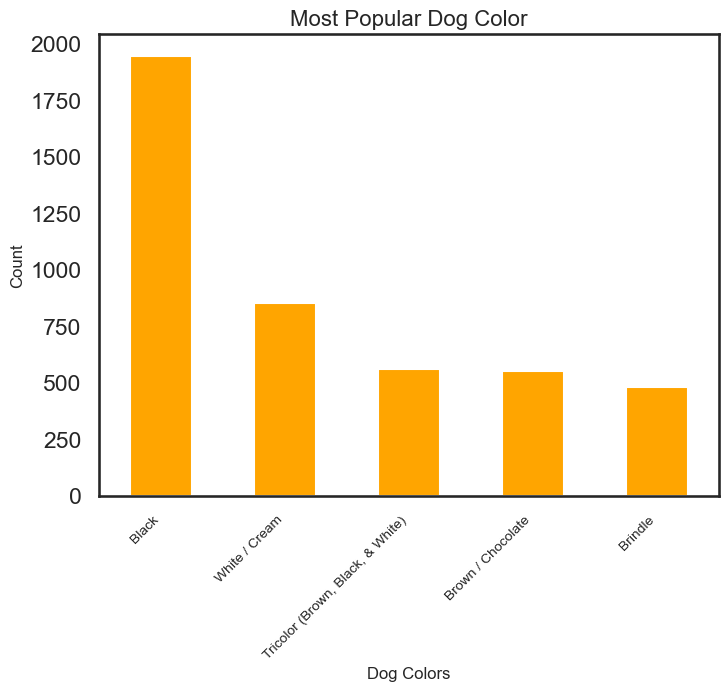

In [76]:
top5_colors_indexed = top5_colors.set_index('color_primary')
plt.figure(figsize=(8, 6))
top5_colors_indexed['count'].plot(kind='bar', color='orange')

plt.title('Most Popular Dog Color', fontsize=16)
plt.xlabel('Dog Colors', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)


This data shows the 10 most popular dog breeds out of all of the dog breeds in the shelter. 

In [78]:
dogs_sort_prim = dogs.dropna(subset=['breed_primary', 'color_primary'])

#sort the data for top 10 dog breeds
top10_breed = dogs_sort_prim['breed_primary'].value_counts().head(10).index

#sort the data for the different colors of the top 5 dogs
top5_color = dogs_sort_prim['color_primary'].value_counts().head(5).index


breed_color_counts = dogs_sort_prim.groupby(['color_primary', 'breed_primary']).size().reset_index(name='count')

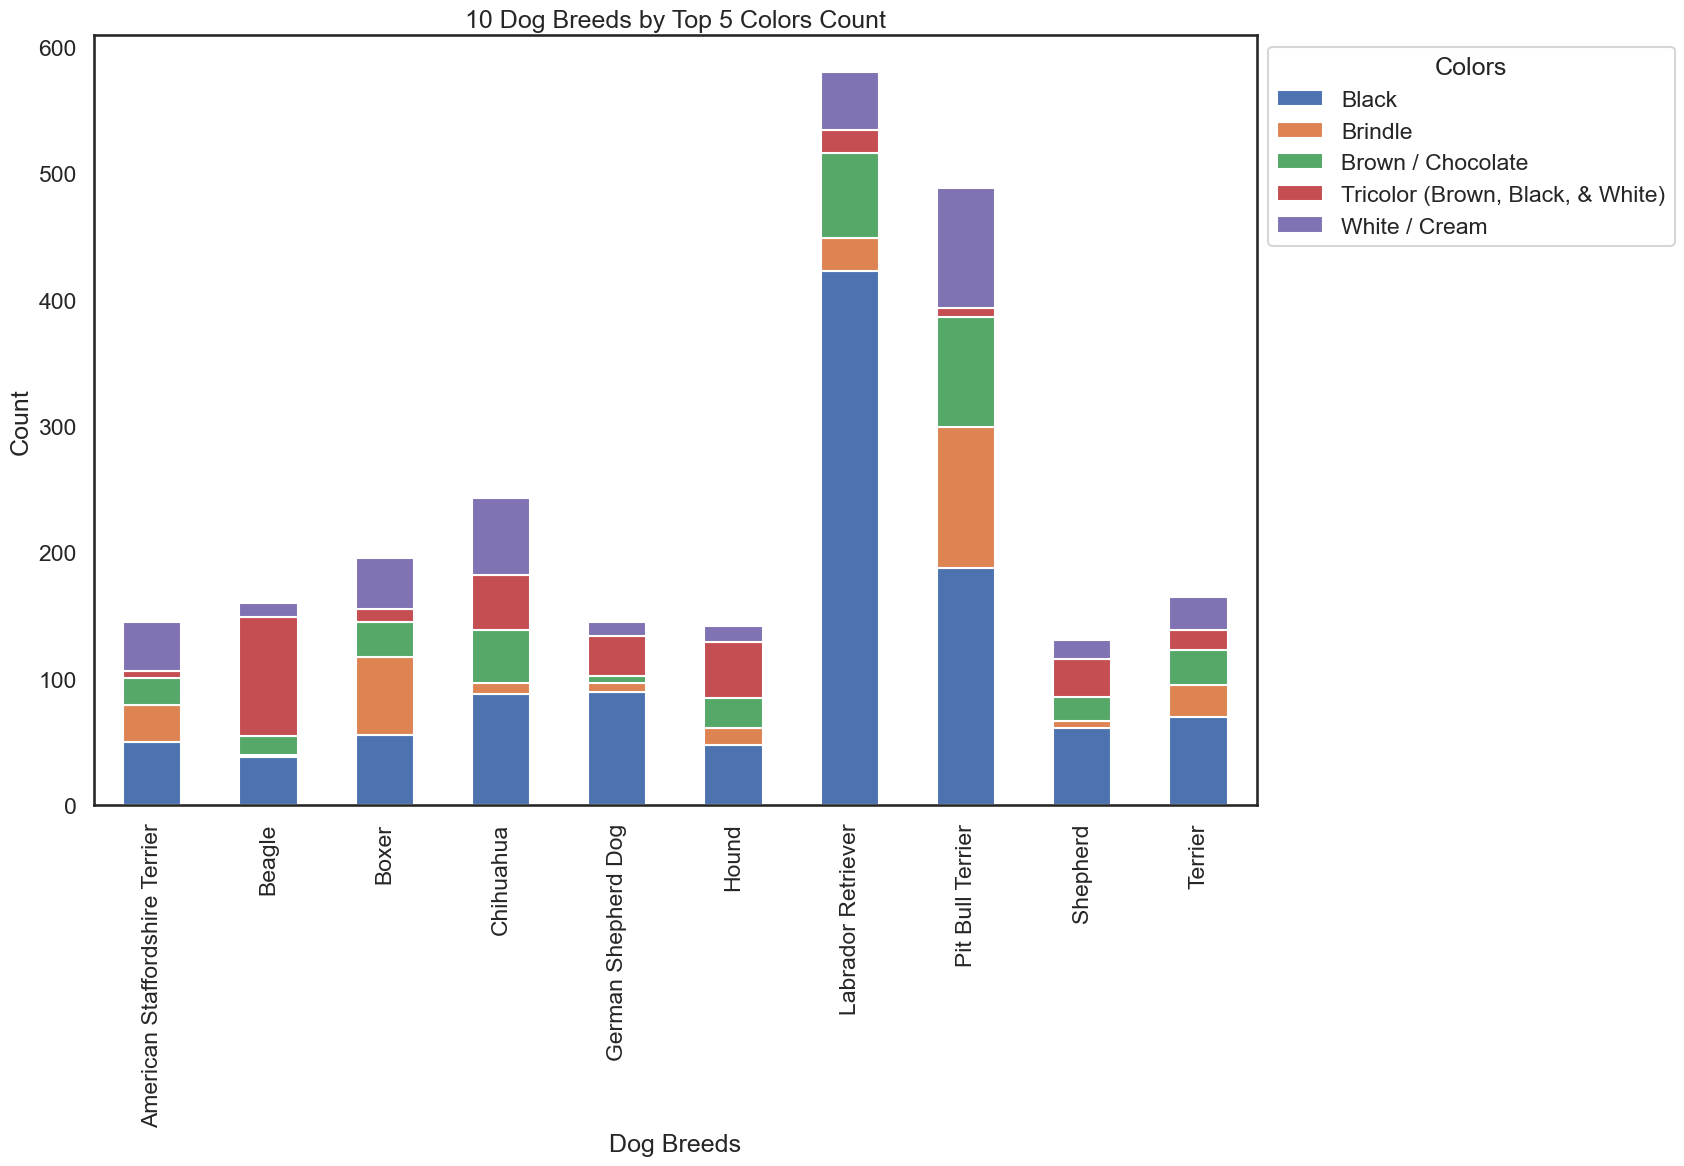

In [79]:
top10_breed_count = dogs_sort_prim['breed_primary'].value_counts().head(10).index
top5_color_count = dogs_sort_prim['color_primary'].value_counts().head(5).index

count_data = breed_color_counts[
    (breed_color_counts['breed_primary'].isin(top10_breed_count)) &
    (breed_color_counts['color_primary'].isin(top5_color_count))
]

count_stacked = count_data.pivot(index='breed_primary', columns='color_primary', values='count').fillna(0)

# Create stacked bar chart was data
count_stacked.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('10 Dog Breeds by Top 5 Colors Count')
plt.xlabel('Dog Breeds')
plt.ylabel('Count')
plt.legend(title='Colors', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

This dataset shows the correlation between the 10 most popular dogs and the top 5 most popular dog colors. From the data, we can conclude that black Labrador Retrievers are the most popular dog color. This stacked bar chart gives us a clear visualization of the distribution of colors among all of the top 10 breeds. From the data, we can visually see that the color Black was the most popular dog color.

## Relationship between breeds and other variables 

Next, we looked at the relationship between the most frequently listed breeds and other variables to see which variables within the top 5 breeds affected the chances to be put up for adoption the most. First, we analyzed the distribution of age within the top few breeds. From the graph below we can see that mostly adult and younger dogs are put up for adoption. Within each age group we can see that the distribution among the top 5 breeds follows the order we saw above suggesting that age doesn't have a strong influence within breeds of whether dogs are put up for adoption or not.

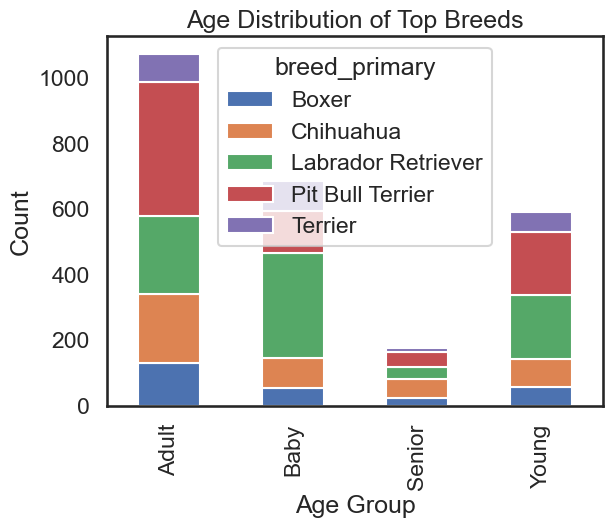

In [83]:
top_breeds = df['breed_primary'].value_counts().head(5).index
age_breed = df[df['breed_primary'].isin(top_breeds)].groupby(['age', 'breed_primary']).size().unstack()
age_breed.plot(kind='bar', stacked=True, title='Age Distribution of Top Breeds')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Next we looked at the relationship between breed and size distribution. From the graph below we can see that most of these dogs fall into the "medium" size category which follows the conclusion we found above when only looking at size. This suggests that the frequency of medium sized dogs in our dataset is from the prevalence of these specific dog breeds. This means that dog breed is a stronger predictor of being put up for adoption versus size.

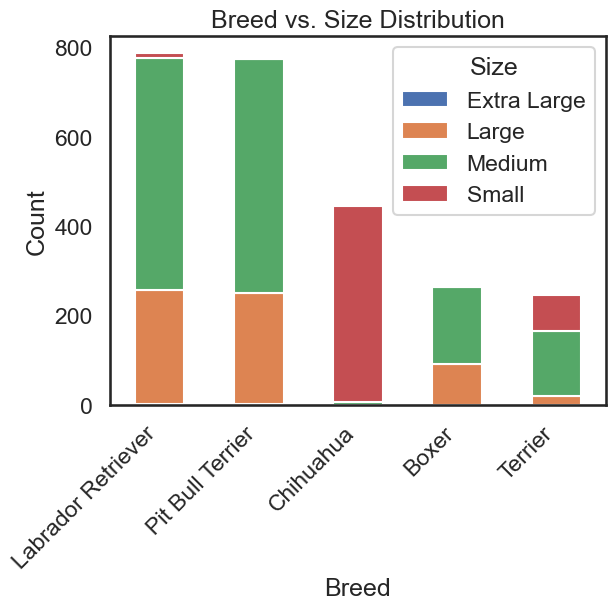

In [85]:
breed_size = df.groupby(['breed_primary', 'size']).size().unstack(fill_value=0)
top_breeds = breed_size.sum(axis=1).nlargest(5).index
breed_size.loc[top_breeds].plot(kind='bar', stacked=True, title='Breed vs. Size Distribution')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Size')
plt.show()

We then did the same thing for breed vs. coat type distribution to see whether it was breed or the coat length that led to dogs being put up for adoption. Most of the dogs in the top 5 most prevalent dog breeds being put up for adoption have short hair. Again this shows that breed is a stronger indicator for being put up for adoption than coat size. 

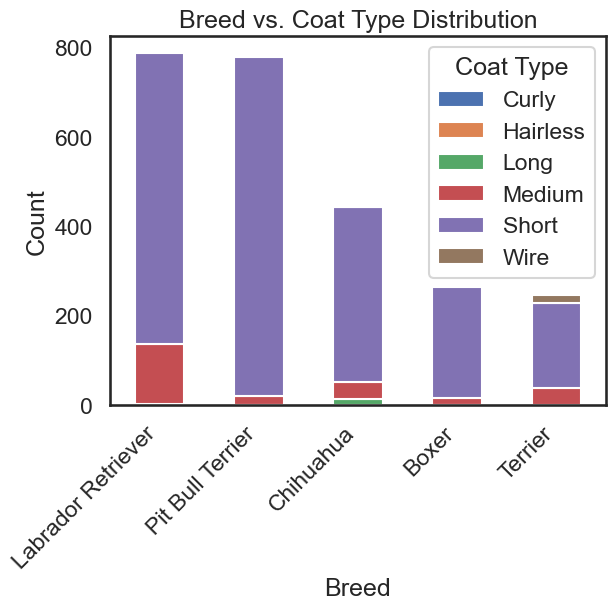

In [87]:
breed_coat = df.groupby(['breed_primary', 'coat']).size().unstack(fill_value=0)
top_breeds = breed_coat.sum(axis=1).nlargest(5).index
breed_coat.loc[top_breeds].plot(kind='bar', stacked=True, title='Breed vs. Coat Type Distribution')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coat Type')
plt.show()

# Ethics & Privacy

There are no issues with privacy as all dogs taken from the data set were from petfinder.com, which is a reliable and ethical source for pet adoption as it collaborates with a vast network of animal shelters and rescue organizations. Their website also helps pet owners with the adoption process and other tips and guides for pet owners. The dataset itself does not include any human biases. However, there is the potential for the patterns expressed in it to have changed since this data is taken from a single day. We will consider these biases to make our conclusions more accurate for trends of that day and time period as opposed to generalizing over a broader time period. We will also detect biases by reviewing the data thoroughly before drawing any conclusions. There are no privacy concerns as the information is publicly available. Any additional issues identified will be handled uniquely depending on what the issue is, by consensus of the group.

# Conclusion

We set out on this project with the goal to understand what factors lead to dogs being put up for adoption in shelters across America. Our preliminary research showed that the number of dogs in shelters has been increasing over the years, and we wanted to learn more about this issue in order to help change this. Previous studies suggest that dogs are surrendered to shelters for various behavioral problems as well as unwanted traits like being a senior dog or having health problems. To delve deeper into this topic, we analyzed a dataset that consisted of detailed traits describing dogs listed on Petfinder, a popular adoption site.

To begin, we first looked at the basic descriptive traits of the dogs: age, sex, size and coat. When analyzing the distributions of these variables, we found there were many more young dogs, medium dogs, and short-coated dogs listed on PetFinder than in the general dog population. Sex did not appear to have an impact on a dog's likelihood to be listed for adoption. We noticed that the large proportion of medium and short-coated dogs correlated with the most frequently listed dog breeds, suggesting that this pattern is due to certain dog breeds being less popular as opposed to the popularity of certain sizes and coat lengths. The most listed dog breeds on Petfinder were labrador retrievers and pit bull terriers, which are mostly medium-sized dogs with short/medium coats. We also found that black dogs were the most frequently listed color of dog. To continue, we looked at true/false variables that correlated with various behavioral and health traits. From this, we concluded that not being house trained was the greatest of these factors to affect a dog being put up for adoption. This makes sense as this behavior would be the most disruptive in a household. Other factors like not being fixed, having special needs, or not having shots can be fixed quite easily compared to not being house trained.

One concern we have is that our data may not be representative of the entire population of dogs put up to adoption, since we only have data from Petfinder. There may be some shelters that take in dogs but do not post them on the internet. Furthermore, there may be patterns across different states that we were unable to analyze since we just looked at America as a whole. For future work, it would be nice to analyze a dataset that includes whether a dog was adopted from a shelter, and how long it took for them to be adopted. This would allow us to better understand what sets apart dogs that are adopted from ones that aren't. From our current data, we only know that these dogs were put up for adoption, but we are unable to see if and when they were adopted.

# Team Contributions

Amber - Data Cleaning, Shelter Locations, Conclusion, Breed Analysis




Adomas - Abstract, Data Cleaning, Behavior/Health, Ethics/Privacy

Annalise - Background, Physical Attributes

Johanna - Breed/Color